## [중간] 
### 1. 코드와 결과를 쓰시오.


- ** data split 여부

a. 주어진 벡터에서 가장 작은 값이 있는 위치를 알고 싶을 때 사용하는 함수는 무엇인가? 예를 들어, x<-c(1,5,10,-4,3) 이라면 4번째 원소 -4가 가장 작 으므로 4가 리턴 되어야 한다. 

In [26]:
#1 (a)
import numpy as np
array_a=np.array([1,5,10,-4,3])
print(array_a==np.min(array_a))

[False False False  True False]


b. [4pts] 다음의 행렬을 만드는 코드를 쓰시오. apply() 함수를 사용해서 각각의 열의 중앙값(median)을 계산하는 코드를 작성하시오.  

In [4]:
#1 (b)
array_b = np.arange(1,21).reshape(4,5)
print(array_b)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]]


c. 위의 행렬에서 각각의 행을 임의로 뒤섞고 싶다. 반드시 sample() 함수를 이용하여 코드를 작성하시오.  

In [5]:
#1 (c)
order=np.random.choice(np.arange(0,4), size=4, replace=False)
print(order)
array_c=[]
for i in order:
    array_c.append(array_b[order[i]])
np.array(array_c).reshape(4,5)

[2 3 0 1]


array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])

d. 표준정규분포에서 20개의 변수를 발생시킨 후에 이를 5x4 matrix에 저 장하자. 이 matrix에서 3번째 컬럼에 있는 값의 순서대로 (작은 값에서 큰 값으로) 행을 재배열하는 코드를 쓰시오. 

In [6]:
#1 (d)
array_d=np.random.randn(5,4)
print(array_d)
array_d[2,:].sort()
print(array_d)

[[-0.1683626  -1.60637491  0.07148773 -0.27091448]
 [-1.48287764  0.11589265 -2.09225363  0.55784838]
 [ 0.30924992 -0.52862277  2.2427292  -0.04462773]
 [-0.46894205 -1.23584467 -0.00786281 -0.42890139]
 [ 1.03863295  1.46548566 -1.22356669 -0.70577762]]
[[-0.1683626  -1.60637491  0.07148773 -0.27091448]
 [-1.48287764  0.11589265 -2.09225363  0.55784838]
 [-0.52862277 -0.04462773  0.30924992  2.2427292 ]
 [-0.46894205 -1.23584467 -0.00786281 -0.42890139]
 [ 1.03863295  1.46548566 -1.22356669 -0.70577762]]


e. X가 t(2)분포를 따른다고 하자 (Student t-distribution). P(X ≤ 2)을 구하 는 코드와 P( X ≤ q) = 0.9 일 때 q의 값을 구하는 코드를 작성하고 그 값 을 구하시오.  -> 범위 X

f. 과목 홈페이지에서 company.csv 파일을 다운로드 받는다. 이 데이터 파 일에는 year, company.A, company.B 3가지 변수가 있다. Company.A는 A회사의 연수익, company.B는 B회사의 연수익이다. 이 자료를 이용하여 다음과 같은 그림을 작성하는 코드를 쓰시오

In [44]:
#1 (f)
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("C:/Users/Jaewon/Bigdata/mid_company.csv")

df = pd.DataFrame(data=data)
df.head()

,year,company.A,company.B
0,2001,999,13
1,2002,992,32
2,2003,973,57
3,2004,936,88
4,2005,875,125


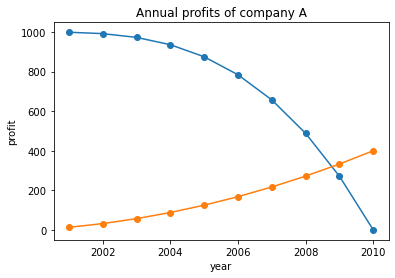

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['year'],df['company.A'])
ax.plot(df['year'],df['company.A'])
ax.scatter(df['year'],df['company.B'])
ax.plot(df['year'],df['company.B'])
plt.title("Annual profits of company A")
plt.xlabel("year")
plt.ylabel("profit")
plt.legend
plt.show()

2.448


(array([ 81., 199., 262., 230., 139.,  63.,  21.,   4.,   0.,   1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

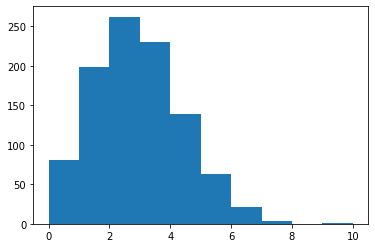

In [39]:
#1 (g)
from scipy.stats import binom

data_binom = binom(n=50, p=0.05) # 시행횟수와 성공확률로 이항분포 생성
sample_binom=data_binom.rvs(1000) # 생성된 분포 기반 1000개의 Sample 생성

avg = np.mean(sample_binom)
print(avg)
ax = plt.subplot()
ax.hist(sample_binom)

# 중심극한정리 -> sampling이 충분히 많이 진행된다면 모집단의 분포에 대한 정보를 얻을 수 있음

### 2. 우리는 아주 간단한 데이터를 분석해볼 것이다 (midtermdata1). Course homepage에서 이 데이터를 다운로드 한 후에 R로 loading하자. 우리는 linear regression 모 형을 사용해서 이 데이터를 분석할 것이다. 
a. 변수 x1과 x2만을 사용해서 모형 적합을 해보자. 적합된 모형의 결과를 쓰시오. 모든 설명변수가 유의한가? R-squared 값은 얼마인가?

In [74]:
# 2. (a)

from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

# import dataset
mydata = pd.read_csv("C:/Users/Jaewon/Bigdata/midtermdata1.txt")

df=pd.DataFrame(mydata)
df.head()

# 변수 설정
X = df.iloc[:,1:3]
Y = df['y']

# 모형 적합
mymodel1 = LinearRegression()
mymodel1.fit(X,Y)
print(f'intercept : {mymodel1.intercept_}')
print('X1 coef :', mymodel1.coef_[0])
print('X2 coef :', mymodel1.coef_[1])


# 결정계수
print('r squared :', round(mymodel1.score(X,Y),3))

 # 설명변수의 유의성
import statsmodels.api as sm
X = sm.add_constant(X)  # intercept 항 추가
model = sm.OLS(Y, X).fit()
model.summary()

# X1은 유의하지 않고, X2는 유의하다

intercept : 22.628119027143157
X1 coef : 7.078909111014065
X2 coef : 9.486595847583208
r squared : 0.856


C:\Users\Jaewon\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     289.4
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           1.30e-41
Time:                        08:38:14   Log-Likelihood:                -614.61
No. Observations:                 100   AIC:                             1235.
Df Residuals:                      97   BIC:                             1243.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6281     23.558      0.961      0.339     -24.128      69.384
x1             7.0789      5.775      1.226      0.223      -4.384      18.542
x2             9.4866      0.398     23.811      0.000       8.696      10.277
==============================================================================
Omnibus:                       62.595   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1768.031
Skew:                          -1.254   Prob(JB):                         0.00
Kurtosis:                      23.446   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

b. R-squared 값의 의미에 대해서 설명하시오.

In [13]:
# 2. (b)
# R-squared 값 : SSR/SST, 모델이 Y의 변동량을 얼마나 설명할 수 있는지 0~1 사이의 수치로 나타냄

c. Fit 이번에는 모든 설명변수를 모형에 넣고 모형적합을 해보자. 모든 변수가 유의한가? R-squared 값은 얼마인가?

In [76]:
# 2. (c)
# 변수 설정
X = df.iloc[:,1:]
Y = df['y']

# 모형 적합
mymodel2 = LinearRegression()
mymodel2.fit(X,Y)
# 결정계수
print('r squared :', round(mymodel2.score(X,Y),3))

 # 설명변수의 유의성
import statsmodels.api as sm
X = sm.add_constant(X)  # intercept 항 추가
model = sm.OLS(Y, X).fit()
model.summary()

# 유의한 설명변수는 x2뿐

r squared : 0.867


C:\Users\Jaewon\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     58.20
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           1.06e-34
Time:                        08:40:45   Log-Likelihood:                -610.66
No. Observations:                 100   AIC:                             1243.
Df Residuals:                      89   BIC:                             1272.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6349     58.121      0.045      0.964    -112.850     118.120
x1             5.8264      6.003      0.971      0.334      -6.102      17.754
x2             9.2823      0.435     21.342      0.000       8.418      10.147
x3           -51.0110     39.940     -1.277      0.205    -130.370      28.348
x4            53.5803     42.773      1.253      0.214     -31.409     138.569
x5            59.1970     40.364      1.467      0.146     -21.006     139.400
x6           -34.0251     41.003     -0.830      0.409    -115.497      47.447
x7            49.3533     39.443      1.251      0.214     -29.019     127.726
x8            22.1760     47.299      0.469      0.640     -71.806     116.158
x9            -6.1550     43.656     -0.141      0.888     -92.899      80.589
x10          -23.1196     44.341     -0.521      0.603    -111.225      64.985
==============================================================================
Omnibus:                       77.992   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1722.646
Skew:                          -1.961   Prob(JB):                         0.00
Kurtosis:                      22.951   Cond. No.                         377.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

d. 위의 (a)와 (c)에서 사용한 두 모형이 통계적으로 다르다고 할 수 있는가? anova test를 이용해서 test하고 결과를 쓰시오. 두 모형 중에 한가지만 선택해야 한다면 어떤 모형을 선택할 것인지, 그리고 그 이유는 무엇인지를 설명하시오

In [17]:
# 결정계수가 크게 다르지 않음, 모형의 복잡도가 더 낮은 첫번째 모델이 더 나을 것

### 3. 우리는 자동차 데이터를 분석하고자 한다. 이 데이터는 연료소비량 (mpg, miles per gallon)과 9개의 자동차의 디자인과 성능에 대한 변수를 가지고 있고 전체 관측치의 수는 32개이다. 연료소비량(mpg)가 반응변수이고 다른 모든 변수는 설명 변수이다.
a. 모든 변수사이의 pariwise plot을 만들어보자. (코드를 쓰시오). 무언가 흥미 있는 pattern이 있는가? 두 변수중에서 높은 correlation이 있는 변수들이 있 는가? 설명변수와 다른 변수사이에 주목할 만한 pattern이 있는가?

In [86]:
#3 (a)
# import dataset
mydata = pd.read_csv("C:/Users/Jaewon/Bigdata/mid_cars.txt")

df=pd.DataFrame(mydata)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,am,gear,carb
Mazda RX4,21.0,6.0,160.0,110,3.90,2.620,16.46,1,4,4
Mazda RX4 Wag,21.0,6.0,160.0,110,3.90,2.875,17.02,1,4,4
Datsun 710,22.8,4.0,108.0,93,3.85,2.320,18.61,1,4,1
Hornet 4 Drive,21.4,6.0,258.0,110,3.08,3.215,19.44,0,3,1
Hornet Sportabout,18.7,8.0,360.0,175,3.15,3.440,17.02,0,3,2


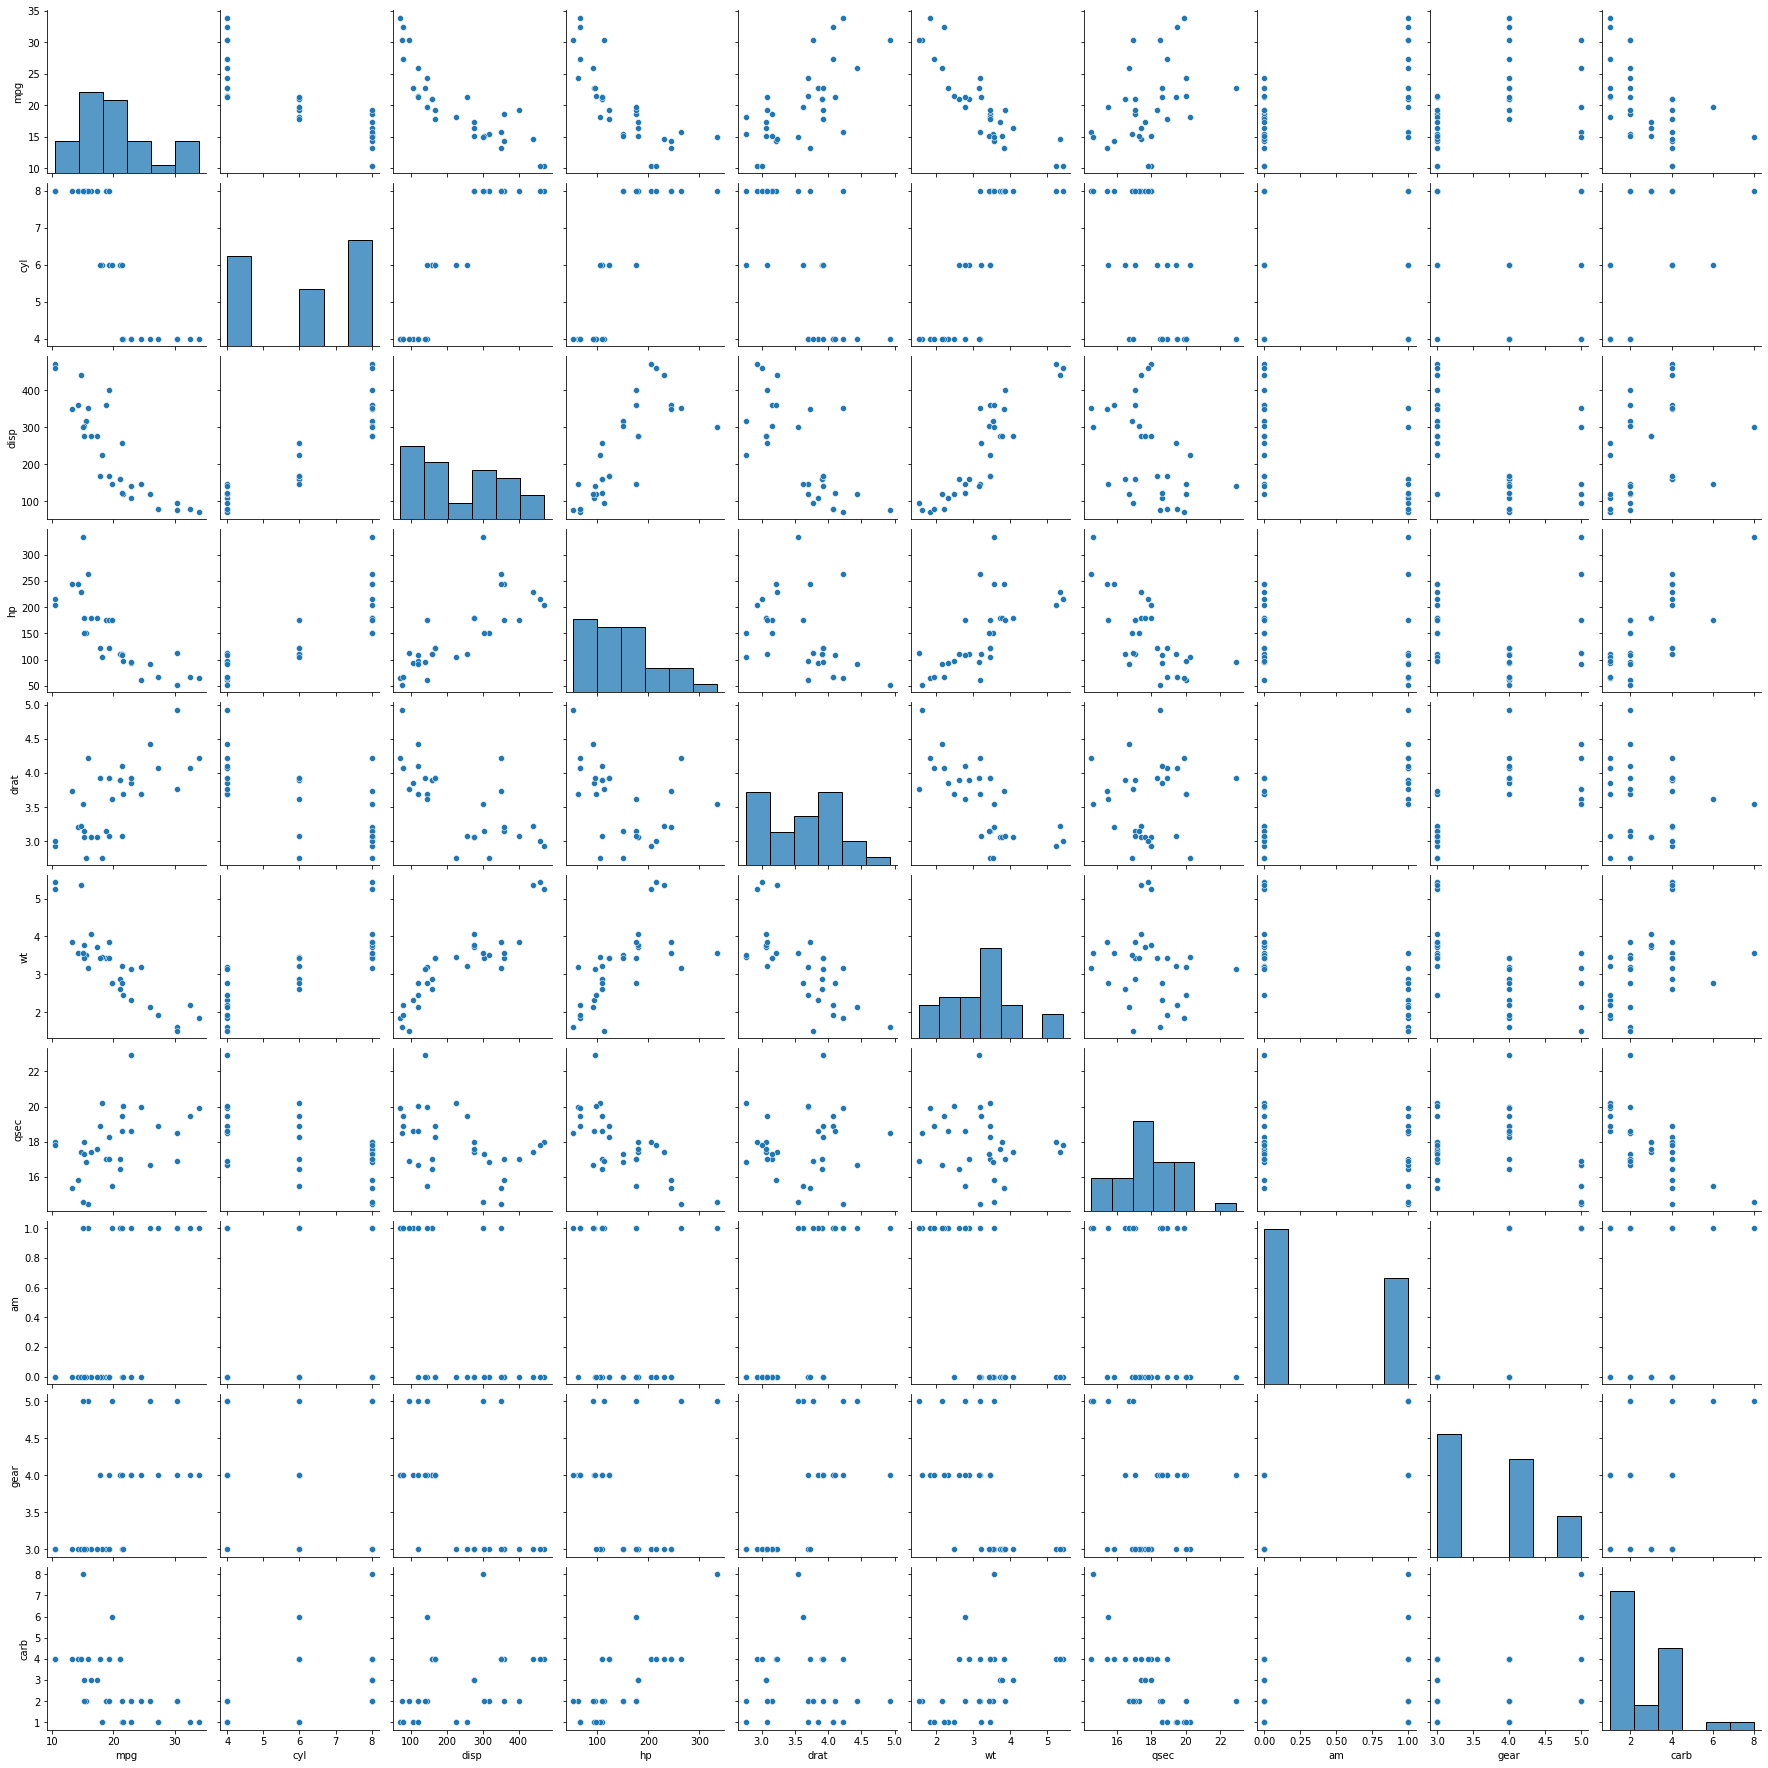

In [78]:
sns.pairplot(data=df)
plt.show()

# mpg와 disp (음), mpg와 hp (음), mpg와 drat (양), mpg와 wt(음)
# disp와 hp (양), wt와 disp (양), wt와 hp (양), wt와 drat (음)

b. 우리는 am값에 따른 mpg 분포를 알고자 한다. mpg vs am plot을 작성하 시오. (코맨드와 R의 결과 그림을 간단히 작성할 것) mpg 분포가 am=0 일때와 am=1 일때 어떤 차이가 있는가?

{'whiskers': [<matplotlib.lines.Line2D at 0x1f344be2ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f344bef400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f344be2910>,
 'medians': [<matplotlib.lines.Line2D at 0x1f344befb20>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f344befeb0>,
 'means': []}

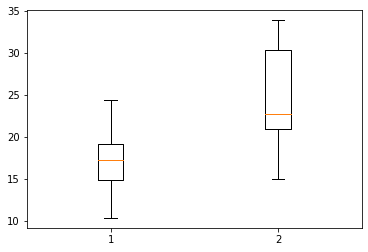

In [83]:
#3 (b)
ax = plt.subplot()
ax.boxplot([df[df['am']==0]['mpg'], df[df['am']!=0]['mpg']])
# am=1일때 mpg가 더 높다

c. 이 데이터에는 missing value가 1개 있다. 어떤 관측치에 결측치가 있는 지를 파악하고, correlation-regression 방법을 사용하여 채우시오. 만약, 이 방법 을 모른다면, 다른 방법을 사용해서라도 채우시오. (힌트: 실린더의 개수는 4, 6, 8 중에 하나이다. 채워지는 값도 이중에 하나가 되어야 한다.) 다음의 질문들에 답하기 위해서는 데이터에 결측치가 있어서는 안된다. am 변수를 factor 변수로 바꾸시오.


In [108]:
#3 (c)
df.info()
df['cyl'].fillna(4,inplace=True)
print(df.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     31 non-null     float64
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   am      32 non-null     int64  
 8   gear    32 non-null     int64  
 9   carb    32 non-null     int64  
dtypes: float64(6), int64(4)
memory usage: 3.8+ KB
0


d. multiple linear regression 방법론을 사용하여 모형 적합을 하고, 그 결과 를 쓰시오. 그리고 그 결과에 대해서 설명하시오.

In [109]:
pd.get_dummies(df['am'])
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,am,gear,carb
Mazda RX4,21.0,6.0,160.0,110,3.90,2.620,16.46,1,4,4
Mazda RX4 Wag,21.0,6.0,160.0,110,3.90,2.875,17.02,1,4,4
Datsun 710,22.8,4.0,108.0,93,3.85,2.320,18.61,1,4,1
Hornet 4 Drive,21.4,6.0,258.0,110,3.08,3.215,19.44,0,3,1
Hornet Sportabout,18.7,8.0,360.0,175,3.15,3.440,17.02,0,3,2


In [112]:
# 변수 설정
X = df.iloc[:,1:]
Y = df.iloc[:,0]

# 모형 적합
mymodel = LinearRegression()
mymodel.fit(X,Y)

print(mymodel.intercept_)
print(mymodel.coef_)

23.667913155502774
[-0.85274313  0.01976863 -0.02132093  0.09177803 -4.65735812  0.7077308
  1.8399174   0.29403572  0.12404999]


e. 위의 모형에 stepwise regression 방법론을 적용하여 변수선택을 하고, 최종모형을 쓰시오. 최종모형에 대해서 설명하시오.  
f. 이번엔 regression tree를 이용해서 모형 적합을 하시오. Cross validation 방법론을 이용하여 deviance가 최소가 되는 optimal tree를 찾고 다음의 질문에 답 하시오. 이 optimal tree가 최종모형이다.

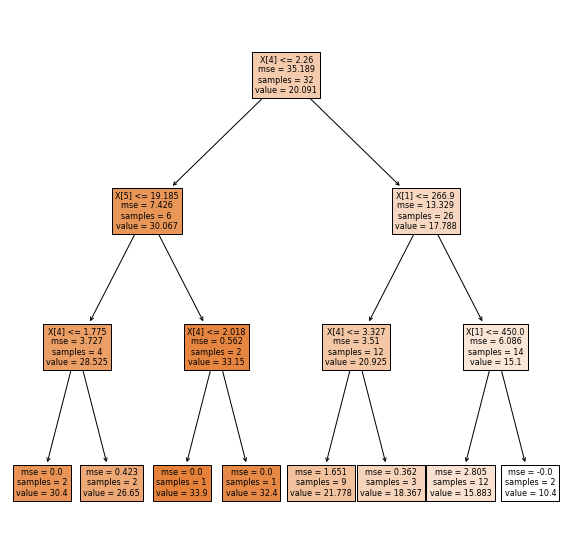

In [113]:
# single tree
from sklearn.tree import DecisionTreeRegressor
cart_reg = DecisionTreeRegressor(max_depth=3) #mse
cart_reg.fit(X,Y)

from sklearn import tree
# Decision tree visualization
fig = plt.figure(figsize=(10,10))
_=tree.plot_tree(cart_reg, 
                impurity = True,
                filled=True) 

In [115]:
# ensemble - gradient boosting
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.ensemble import GradientBoostingRegressor
mygbt = GradientBoostingRegressor(learning_rate = 0.1, random_state = 0)
mygbt.fit(X, Y)

GradientBoostingRegressor(random_state=0)

i. regression tree에서 fitted value는 어떻게 결정되는가?
- 최종 노드에 속한 관측치들의 Y값의 평균값  

ii. 최종모형에서 선택된 변수들은 무엇인가?  
iii 가장 왼쪽에 있는 terminal node에는 몇 개의 관측치가 있는가? 이 terminal node에서의 fitted value는 무엇인가?  
iv. 최종모형을 그리고 설명하시오.   
g. 위의 두가지 모형 (stepwise regression의 결과와 optimal tree)의 normalized mean squared error (NMSE)값을 전체 데이터를 이용하여 계산하시오. 어떤 모형이 더 좋은 성능을 보이는가?

### 4. Answer the following questions
a. (Optimal model) 모형의 성능비교를 위해서 우리가 고려해야 할 2가지 사항이 무엇인가? 그리고 이 2가지 사항을 동시에 개선하는 것이 왜 어려운지 를 설명하시오.

In [117]:
# 과적합된 경우가 아닌지
# 분류의 경우 데이터가 unbalanced인지 확인. 
# 일부 class의 비율이 큰 경우 오분류율로 모형의 성능을 파악하는 데에 한계가 있음. 
# 단순히 majority class로 분류하기만 해도 오분류율이 적게 나올 수 있기에

b. k-nearest neighborhood 방법론을 사용해서 결측치를 채워넣을 때, observation사이의 거리를 계산해야 한다. 이렇게 거리를 계산할 때, 각각의 변 수를 standardize하는 경우가 종종 있다. 왜 standardize 하는지 설명하시오. -> 범위 X  
c. 송교수는 수업시간에 여러 번 모형간 성능비교를 할 때 cv-error나 test set에서의 prediction error를 사용해야 한다고 말했다. 왜 그냥 training set을 사용해서는 안 되는지 그 이유를 설명하시오

In [118]:
# 훈련에 사용한 데이터로 모델을 평가하면 성능이 좋게 나올 수 밖에 없음. 
# 훈련할 때 사용하지 않은 데이터로 평가해야함